# 1.提出问题

# 2.数据获取

# 3.理解数据

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
managers = pd.read_excel('F:\Found\manager.xlsx')
present = pd.read_excel('F:\Found\present.xlsx')

In [3]:
#查看元数据有几行几列
print('managers 共有{}行{}列。'.format(managers.shape[0], managers.shape[1]))
print('present 共有{}行{}列。'.format(present.shape[0], present.shape[1]))

managers 共有1924行7列。
present 共有11099行14列。


In [4]:
managers.info()
managers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 7 columns):
经理编码          1924 non-null int64
基金经理          1924 non-null object
累计任职时间        1924 non-null object
任职起始日期        1924 non-null datetime64[ns]
现任基金公司        1924 non-null object
现任基金资产总规模     1924 non-null object
任职期间最佳基金回报    1909 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 105.3+ KB


,经理编码,基金经理,累计任职时间,任职起始日期,现任基金公司,现任基金资产总规模,任职期间最佳基金回报
0,30591017,谢创,176天,2018-09-11,创金合信基金管理有限公司,44.39亿元,0.0275
1,30048530,黎颖芳,10年又17天,2009-02-19,建信基金管理有限责任公司,330.77亿元,0.3410
2,30197926,袁争光,4年又256天,2013-01-31,博道基金管理有限公司,3.96亿元,0.9239
3,30600699,张佳蕾,138天,2018-10-19,鹏华基金管理有限公司,104.59亿元,0.0105
4,30198031,谢治宇,6年又37天,2013-01-29,兴全基金管理有限公司,315.97亿元,2.5227


In [5]:
present.info()
present.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 14 columns):
经理编码      11099 non-null int64
基金代码      11099 non-null int64
基金名称      11099 non-null object
基金类型      11099 non-null object
近三月       11099 non-null object
同类排名      11099 non-null object
近六月       11099 non-null object
同类排名.1    11099 non-null object
近一年       11099 non-null object
同类排名.2    11099 non-null object
近两年       11099 non-null object
同类排名.3    11099 non-null object
今年来       11099 non-null object
同类排名.4    11099 non-null object
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


,经理编码,基金代码,基金名称,基金类型,近三月,同类排名,近六月,同类排名.1,近一年,同类排名.2,近两年,同类排名.3,今年来,同类排名.4
0,30591017,6874,创金恒兴中短债债券A,债券型,-,-|1463,-,-|1332,-,-|1209,-,-|1041,-,-|1525
1,30591017,6875,创金恒兴中短债债券C,债券型,-,-|1463,-,-|1332,-,-|1209,-,-|1041,-,-|1525
2,30591017,6824,创金合信鑫日享短债债券A,债券型,-,-|1463,-,-|1332,-,-|1209,-,-|1041,-,-|1525
3,30591017,6825,创金合信鑫日享短债债券C,债券型,-,-|1463,-,-|1332,-,-|1209,-,-|1041,-,-|1525
4,30591017,3749,创金合信鑫收益混合A,混合型,0.0222,2330|2779,-0.0093,2555|2702,-0.0019,1131|2502,0.0589,1070|1990,0.0241,2379|2798


# 4.数据清洗

# 4.1选择子集

In [6]:
# managers 中仅需要使用【经理编码】、【基金经理】、【累计任职时间】这三个字段
# present 无需使用【今年来】、【同类排名.4】字段
managers = managers.drop(columns=['任职起始日期','现任基金公司','现任基金资产总规模','任职期间最佳基金回报'], axis=1)
present = present.drop(columns=['今年来','同类排名.4'], axis=1)

In [7]:
'''
我们想要分析的基金类型是股票型、混合型及指数型基金。数据集中的基金类型比较复杂，包含：'混合型', '债券型', '定开债券', '货币型', '分级杠杆', 
'固定收益', '理财型', 'ETF-场内','联接基金', 'QDII-指数', '股票指数', '股票型', 'QDII', 'QDII-ETF', '保本型','债券指数', '其他创新'
我们只找到最符合目的的基金类型：
股票型：'股票型'
混合型：'混合型'
指数型：'股票指数'
'''
present['基金类型'].unique()
#present[present['基金类型']=='股票指数']
present = present.loc[present['基金类型'].isin(['股票指数','股票型','混合型']),:]
#present.head()

# 4.2将部分列拆分

In [8]:
present[["近三月排名","近三月同类基金数量"]] = present["同类排名"].apply(lambda x: pd.Series([i for i in x.split("|")]))
present[["近六月排名","近六月同类基金数量"]] = present["同类排名.1"].apply(lambda x: pd.Series([i for i in x.split("|")]))
present[["近一年排名","近一年同类基金数量"]] = present["同类排名.2"].apply(lambda x: pd.Series([i for i in x.split("|")]))
present[["近两年排名","近两年同类基金数量"]] = present["同类排名.3"].apply(lambda x: pd.Series([i for i in x.split("|")]))

In [9]:
present = present.drop(["同类排名","同类排名.1","同类排名.2","同类排名.3"], axis=1)

# 4.3列名重命名

In [10]:
present.rename(columns={"近三月":"近三月收益率","近六月":"近六月收益率","近一年":"近一年收益率","近两年":"近两年收益率"},inplace=True)
#resent.head()

# 4.4删除重复值

In [11]:
#没有重复值
managers['经理编码'].nunique()
#有重复值，删除重复值
present['基金代码'].nunique()
present = present.drop_duplicates(subset=['基金代码'], keep='first')
present.shape[0]

3850

# 4.4缺失值处理

In [12]:
present = present[present['近两年排名']!='-']
#present.head()

# 4.5一致化处理

In [13]:
managers['year'] = [int(x.split('年又')[0]) if x.find('年又')>0 else 0 for x in managers['累计任职时间']]
managers['day'] = [x.split('年又')[1] if x.find('年又')>0 else x for x in managers['累计任职时间']]
managers['day'] = [int(x.split('天')[0]) for x in managers['day']]
managers['累计任职时间'] = managers['year']*365 + managers['day']

In [14]:
managers = managers.drop(columns=['year','day'], axis=1)
managers.head()

,经理编码,基金经理,累计任职时间
0,30591017,谢创,176
1,30048530,黎颖芳,3667
2,30197926,袁争光,1716
3,30600699,张佳蕾,138
4,30198031,谢治宇,2227


In [15]:
present['基金代码'] = present['基金代码'].map(lambda x: str(x))
present['基金代码'] = ['0'*(6-len(x))+x for x in present['基金代码']]
present.head()

,经理编码,基金代码,基金名称,基金类型,近三月收益率,近六月收益率,近一年收益率,近两年收益率,近三月排名,近三月同类基金数量,近六月排名,近六月同类基金数量,近一年排名,近一年同类基金数量,近两年排名,近两年同类基金数量
4,30591017,003749,创金合信鑫收益混合A,混合型,0.0222,-0.0093,-0.0019,0.0589,2330,2779,2555,2702,1131,2502,1070,1990
6,30591017,003750,创金合信鑫收益混合C,混合型,0.0017,-0.0523,-0.0455,0.1946,2694,2779,2660,2702,1599,2502,280,1990
29,30198031,163406,兴全合润分级混合,混合型,0.1875,0.1834,-0.0349,0.2137,340,2779,179,2702,1498,2502,229,1990
59,30285153,519773,交银数据产业灵活配置混合,混合型,0.2233,0.0733,0.0494,-0.0861,149,2779,1312,2702,443,2502,1715,1990
60,30285153,519767,交银科技创新灵活配置混合,混合型,0.2238,0.0887,0.1563,0.1022,146,2779,1097,2702,87,2502,775,1990


# 4.6格式清洗

In [16]:
#查看每个基金经理的经理编码是否是唯一值
managers['经理编码'].nunique()
#查看每个基金代码是否是唯一值
present['基金代码'].nunique()

2520

In [17]:
present['近三月收益率'] = present['近三月收益率'].astype('float')
present['近六月收益率'] = present['近六月收益率'].astype('float')
present['近一年收益率'] = present['近一年收益率'].astype('float')
present['近两年收益率'] = present['近两年收益率'].astype('float')
present['近三月排名'] = present['近三月排名'].astype('float')
present['近三月同类基金数量'] = present['近三月同类基金数量'].astype('float')
present['近六月排名'] = present['近六月排名'].astype('float')
present['近六月同类基金数量'] = present['近六月同类基金数量'].astype('float')
present['近一年排名'] = present['近一年排名'].astype('float')
present['近一年同类基金数量'] = present['近一年同类基金数量'].astype('float')
present['近两年排名'] = present['近两年排名'].astype('float')
present['近两年同类基金数量'] = present['近两年同类基金数量'].astype('float')

# 5.数据分析

In [18]:
#任职时间过短的基金经理业绩的取得，随机因素产生的影响可能比较大，所以我们选取【累计任职时间】达到两年的，也就是>=730天
managers = managers.loc[managers['累计任职时间']>=730,:]

In [19]:
#将managers与present进行联结
total = pd.merge(managers, present, on='经理编码', how='left')
#total.shape[0]

In [20]:
#看那一下，有没有基金代码为空的数据，这可能是抓取的时候漏抓了，或网页根本就没有此类数据。找到它们，然后删除。
total['基金代码'].isnull().sum()
total = total.dropna(how='any')
#total.shape[0]
#total.head()

In [21]:
#首先计算出各阶段分位数
total['近三月排名百分位'] = total['近三月排名']/total['近三月同类基金数量']
total['近三月排名得分'] = total.apply(lambda x:0.8 if x['近三月排名百分位']<=0.25 else 0.6 if x['近三月排名百分位']>0.25 and x['近三月排名百分位']\
                              <=0.5 else 0.4 if x['近三月排名百分位']>0.5 and x['近三月排名百分位']<=0.75 else 0,axis=1)
total['近六月排名百分位'] = total['近六月排名']/total['近六月同类基金数量']
total['近六月排名得分'] = total.apply(lambda x:0.8 if x['近六月排名百分位']<=0.25 else 0.6 if x['近六月排名百分位']>0.25 and x['近六月排名百分位']\
                              <=0.5 else 0.4 if x['近六月排名百分位']>0.5 and x['近六月排名百分位']<=0.75 else 0,axis=1)
total['近一年排名百分位'] = total['近一年排名']/total['近一年同类基金数量']
total['近一年排名得分'] = total.apply(lambda x:0.8 if x['近一年排名百分位']<=0.25 else 0.6 if x['近一年排名百分位']>0.25 and x['近一年排名百分位']\
                              <=0.5 else 0.4 if x['近一年排名百分位']>0.5 and x['近一年排名百分位']<=0.75 else 0,axis=1)
total['近两年排名百分位'] = total['近两年排名']/total['近两年同类基金数量']
total['近两年排名得分'] = total.apply(lambda x:0.8 if x['近两年排名百分位']<=0.25 else 0.6 if x['近两年排名百分位']>0.25 and x['近两年排名百分位']\
                              <=0.5 else 0.4 if x['近两年排名百分位']>0.5 and x['近两年排名百分位']<=0.75 else 0,axis=1)

In [22]:
#接下来计算每个基金的总体评分
total['总体评分'] = total['近三月排名得分']*0.05 + total['近六月排名得分']*0.1 + total['近一年排名得分']*0.25 + total['近两年排名得分']*0.6

In [23]:
#计算基金经理得分：按照基金类型和基金经理进行分组，用每个经理管理的每种类型的基金得分的计算平均数作为该基金经理该类型基金的得分。
def get_score(df,lx):
    df2 = df[df['基金类型']==lx]
    m_score = df2.groupby('基金经理', as_index=False)['总体评分'].mean()
    return m_score

In [24]:
#股票型基金基金经理得分情况
m_gp = get_score(total,'股票型')
m_gp.sort_values('总体评分',ascending=False).head(10)

,基金经理,总体评分
119,贾成东,0.80
8,冯明远,0.80
145,高源,0.80
18,周应波,0.80
30,张宇帆,0.80
109,袁芳,0.80
61,杨柯,0.80
131,郭敏,0.80
77,王君正,0.79
93,肖觅,0.79


In [25]:
#混合型基金基金经理得分情况
m_hh = get_score(total,'混合型')
m_hh.sort_values('总体评分',ascending=False).head(10)

,基金经理,总体评分
485,苏秉毅,0.8
440,神玉飞,0.8
532,计伟,0.8
133,国晓雯,0.8
641,陶曙斌,0.8
420,王维诚,0.8
15,付斌,0.8
139,姚爽,0.8
603,金梓才,0.8
58,刘彦春,0.8


In [26]:
#股票指数型基金基金经理得分情况
m_zs = get_score(total,'股票指数')
m_zs.sort_values('总体评分',ascending=False).head(10)

,基金经理,总体评分
51,梅律吾,0.79
38,方旻,0.79
33,彭海平,0.79
84,陈建华,0.79
76,赵云阳,0.78
31,张胜记,0.78
12,吴迪,0.77
58,申庆,0.76
66,苏卿云,0.74
3,何如,0.74


In [27]:
lx_group = total.groupby('基金类型',as_index=False).agg({'近三月收益率':np.mean, '近六月收益率':np.mean, '近一年收益率':np.mean,\
                                                 '近两年收益率':np.mean,})
lx_group['score'] = lx_group['近三月收益率']*0.05+lx_group['近六月收益率']*0.1+lx_group['近一年收益率']*0.25+lx_group['近两年收益率']*0.6
lx_group

,基金类型,近三月收益率,近六月收益率,近一年收益率,近两年收益率,score
0,混合型,0.108128,0.079099,-0.015479,0.077159,0.055742
1,股票型,0.151501,0.102113,-0.063132,0.052114,0.033272
2,股票指数,0.161105,0.132234,-0.055274,-0.001024,0.006846


In [28]:
font = {'family':'SimHei'}
plt.rc('font',**font)
def plot_bar(df):
    df['基金经理评分'] = pd.cut(df['总体评分'],bins=np.arange(0,1,0.1))
    sns.set_palette('muted')
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x='基金经理评分')
    plt.xticks(rotation=45)
    return plt.show()

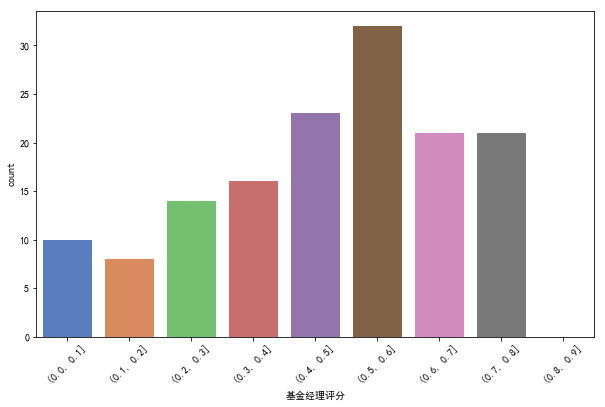

In [29]:
#股票型基金各分段基金经理数量
plot_bar(m_gp)

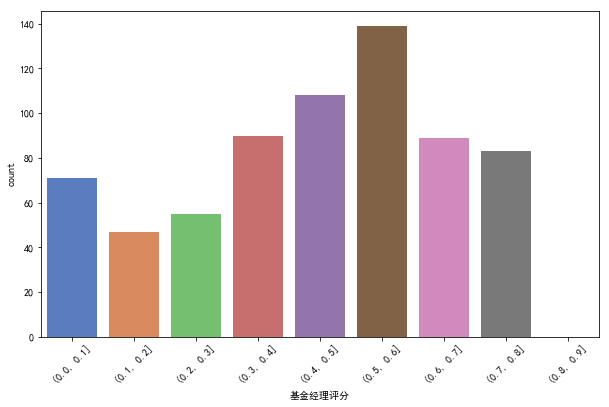

In [30]:
#混合型基金各分段基金经理数量
plot_bar(m_hh)

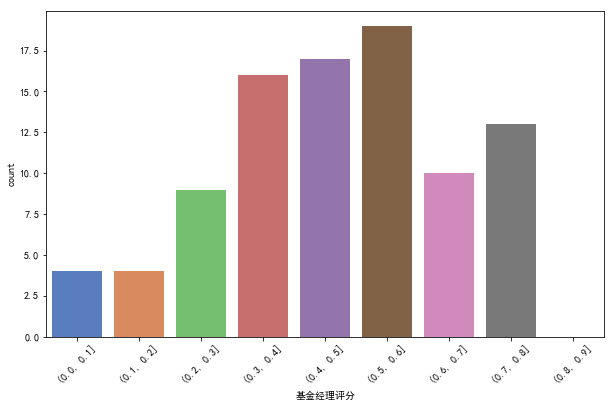

In [31]:
#指数型基金各分段基金经理数量
plot_bar(m_zs)

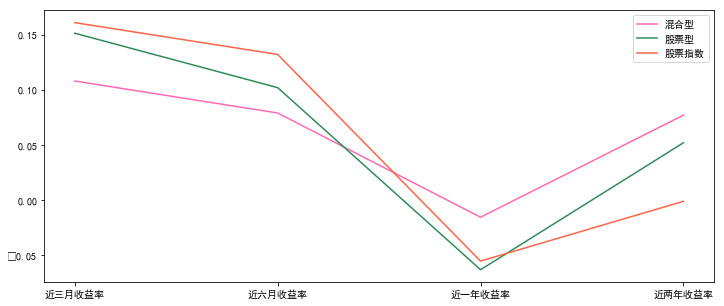

In [32]:
font = {'family':'SimHei'}
plt.rc('font',**font)
y1 = list(lx_group.iloc[0,1:5])
y2 = list(lx_group.iloc[1,1:5])
y3 = list(lx_group.iloc[2,1:5])
x = list(lx_group.columns)[1:5]
plt.figure(figsize=(12,5))
plt.plot(x,y1,color='hotpink',label='混合型')
plt.plot(x,y2,color='seagreen',label='股票型')
plt.plot(x,y3,color='tomato',label='股票指数')
plt.legend()
plt.show()